In [3]:
import sys
sys.path.append("/home/andrew/Hackathon")

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import Matern, ConstantKernel, WhiteKernel,RationalQuadratic
import matplotlib
matplotlib.use('Agg')
from matplotlib import colors
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.mlab as mlab
from matplotlib.patches import Arc
from gp.output_models import build_model, plot_model



data = pd.read_csv('/home/andrew/Hackathon/ScoreData/almiron.csv')
model = build_model(data)

/home/andrew/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/andrew/.local/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/andrew/.local/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/andrew/.local/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/home/andrew/.lo

/home/andrew/.local/lib/python3.5/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


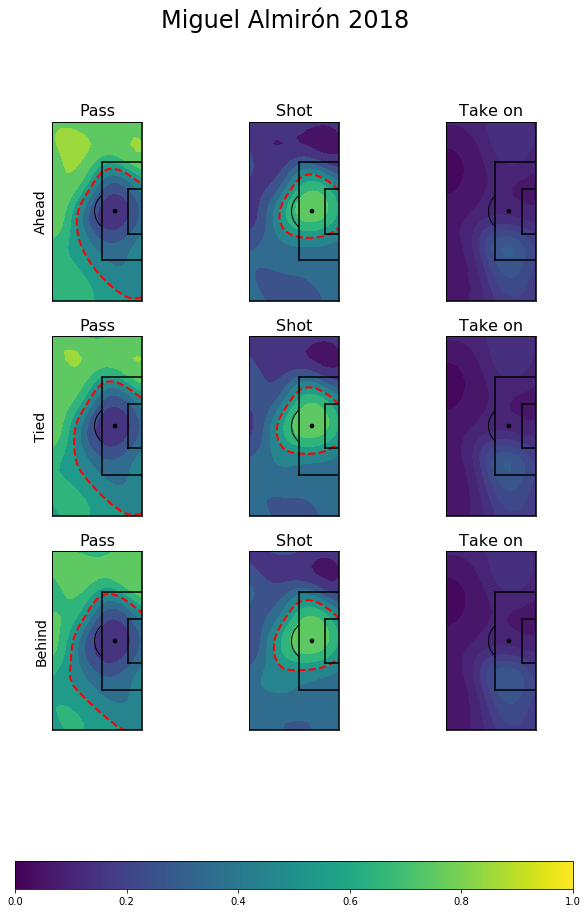

In [37]:
%matplotlib inline
N_CLASSES = 3
CLASSES = ["Pass", "Shot", "Take on"]
FEATURES = ["x_real", "y_real","score"]

player = str(data.player.iloc[0])
name = player.split(' ')
x1 = np.linspace(75, 115, 25)
x2 = np.linspace(0, 80, 25)
#grid = np.transpose([np.tile(x1, len(x2)), np.tile(x2, len(x1))])
xx, yy = np.meshgrid(x1, x2)
preds = []
fig1, axes = plt.subplots(nrows=3, ncols=3)
fig1.set_size_inches(10, 16)
figlist = []
k=1
for i in range(3):
    X = np.vstack([xx.ravel(), yy.ravel(), k * np.ones(len(xx.ravel()))]).T
    y = model.predict_proba(X)
    ys = []
    ys.append(y.T[np.argwhere(model.classes_ == 'Pass'), :].reshape((25, 25)))
    ys.append(y.T[np.argwhere(model.classes_ == 'Shot'), :].reshape((25, 25)))
    ys.append(y.T[np.argwhere(model.classes_ == 'Take on'), :].reshape((25, 25)))
    k -= 1
    if i==0:
        y1=ys
    elif i==1:
        y2=ys
    else:
        y3=ys

    for j in range(3):
        ax = axes[i,j]

        #Pitch Outline & Centre Line
        ax.plot([75,75],[0,80], color="black")
        ax.plot([75,115],[80,80], color="black")
        ax.plot([115,115],[80,0], color="black")
        ax.plot([115,75],[0,0], color="black")

        #Right Penalty Area
        ax.plot([115,97],[62,62],color="black")
        ax.plot([97,97],[62,18],color="black")
        ax.plot([97,115],[18,18],color="black")

        #Right 6-yard Box
        ax.plot([115,109],[50,50],color="black")
        ax.plot([109,109],[50,30],color="black")
        ax.plot([109,115],[30,30],color="black")

        #Prepare Circles
        rightPenSpot = plt.Circle((103,40),0.8,color="black")

        #Draw Circles
        ax.add_patch(rightPenSpot)

        ax.set_aspect('equal')

        #Prepare Arcs
        rightArc = Arc((103,40),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

        #Draw Arcs
        ax.add_patch(rightArc)
        ax.set_title(CLASSES[j], fontsize=16)
        ax.set_xticks([])
        ax.set_yticks([])
        if j==0:
            if i==0:
                ax.set_ylabel('Ahead',fontsize=14)
            elif i==1:
                ax.set_ylabel('Tied',fontsize=14)
            else:
                ax.set_ylabel('Behind',fontsize=14)

        ax.contour(xx, yy, ys[j], [.5, 1], colors='red', linewidths=2, linestyles="--")
        fig = ax.contourf(xx, yy, ys[j], vmin=0, vmax=1)
        figlist.append(fig)
        plt.ylim(0, 80)
        plt.xlim(75, 115)

m = plt.cm.ScalarMappable(cmap=cm.viridis)
m.set_array(y)
m.set_clim(0, 1)
fig1.colorbar(m, ax=axes.ravel().tolist(),orientation='horizontal', ticks=np.arange(0, 1.2, .2))
fig1.suptitle(player+str(' 2018'),fontsize=24)
plt.show();

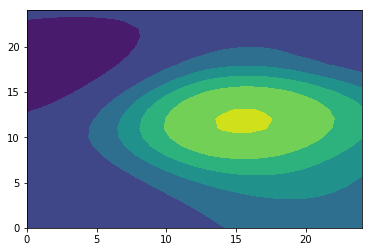

In [26]:
yq = []
yq.append(y3[0]-y2[0]-y1[0])
yq.append(y3[1]-y2[1]-y1[1])
yq.append(y3[2]-y2[2]-y1[2])

plt.contourf(yq[0])
plt.show();